# Trees

This will be a notebook examining the following different tree algorithms

1. Plain Decision Tree Classifier
2. Random Forest Classifier
3. Adaboot Classifier 
4. XGBoost Classifier 

on the Autism Screening Adult dataset. https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult#

First we will load the data from a public repository in github setup for this purpose.

## Preprocessing

Loading the data into a data frame

In [ ]:
import pandas as pd

# use read csv to get the data into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/M0nster5/CS4372-Projects/main/Trees/autism.csv')

# use head() function to look at first five rows
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


There were a couple spelling mistakes that we will fix below

In [ ]:
df = df.rename(columns={'jundice': 'jaundice', 'austim': 'autism', 'contry_of_res': 'country_of_res'})

### Examine the data for consistency
- correct data type for variables
- null values
- missing data
- remove unvaluable columns
- mispelling

In [ ]:
df.dtypes

id                  int64
A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

In [ ]:
df.isna().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

There appear to be no NA's but in some columns there are ? for missing data we will replace those with NA's

In [ ]:
df = df.replace('?', pd.NA)
df.isna().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jaundice            0
autism              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

We will replace NA's with the mode for this categorical data

In [ ]:
print(df.ethnicity.mode())
print(df.relation.mode())

0    White-European
dtype: object
0    Self
dtype: object


In [ ]:
df.ethnicity.fillna("White-European", inplace = True)
df.relation.fillna("Self", inplace = True)
df.isna().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

We still have NA's for Age but we cant change the type until we fill it here

In [ ]:
df.age = df.age.fillna(0).astype('int64')
df.age[df.age == 0] = pd.NA
df.age.fillna(int(df.age.mean(skipna=True)), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now that the NA's have been replaced we will make sure everything has a proper type

In [ ]:
df.dtypes

id                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
autism              object
country_of_res      object
used_app_before     object
result               int64
age_desc            object
relation            object
Class/ASD           object
dtype: object

Here we are reassigning types to the categorical and numerical data. Categories that only have two levels will have cat codes 0 and 1

In [ ]:
df.A1_Score = df.A1_Score.astype('category').cat.codes
df.A2_Score = df.A2_Score.astype('category').cat.codes
df.A3_Score = df.A3_Score.astype('category').cat.codes
df.A4_Score = df.A4_Score.astype('category').cat.codes
df.A5_Score = df.A5_Score.astype('category').cat.codes
df.A6_Score = df.A6_Score.astype('category').cat.codes
df.A7_Score = df.A7_Score.astype('category').cat.codes
df.A8_Score = df.A8_Score.astype('category').cat.codes
df.A9_Score = df.A9_Score.astype('category').cat.codes
df.A10_Score = df.A10_Score.astype('category').cat.codes
df.age = df.age.astype('int64')
df.gender = df.gender.astype('category')
df.ethnicity = df.ethnicity.astype('category')
df.jaundice = df.jaundice.astype('category').cat.codes
df.autism = df.autism.astype('category')
df.country_of_res = df.country_of_res.astype('category')
df.used_app_before = df.used_app_before.astype('category').cat.codes
df.age_desc = df.age_desc.astype('category')
df['Class/ASD'] = df['Class/ASD'].astype('category').cat.codes
df.relation = df.relation.astype('category')
df.dtypes



id                    int64
A1_Score               int8
A2_Score               int8
A3_Score               int8
A4_Score               int8
A5_Score               int8
A6_Score               int8
A7_Score               int8
A8_Score               int8
A9_Score               int8
A10_Score              int8
age                   int64
gender             category
ethnicity          category
jaundice               int8
autism             category
country_of_res     category
used_app_before        int8
result                int64
age_desc           category
relation           category
Class/ASD              int8
dtype: object

Now we will look at an output summary of the different variables

In [ ]:
df.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,jaundice,used_app_before,result,Class/ASD
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.696023,0.098011,0.017045,4.875000,0.268466
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.484009,0.297541,0.129533,2.501493,0.443476
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,3.000000,0.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,4.000000,0.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,0.000000,0.000000,7.000000,1.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,1.000000,1.000000,10.000000,1.000000


Everything looks normal except age has a max of 383, we will fix this by replacing it with the mean.

In [ ]:
df[df.age == df.age.max()]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,53,1,0,0,0,0,0,0,0,0,...,f,Pasifika,0,no,New Zealand,0,1,18 and more,Self,0


In [ ]:
df.age[52] = int(df.drop(52).age.mean())
df.age.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


64

Now we will take a look at the value counts of our target. You can see that the distribution is unbalanced and we have many more cases without autism than with. This will be something to consider when assessing accuracy.

In [ ]:
df.autism.value_counts()

no     613
yes     91
Name: autism, dtype: int64

Now, we can realize that the ID is not useful and we should not include it. Additionally all the questions except the first and eigth have a similiar mean and distribution which is interesting.

In [ ]:
df = df[[column for column in df.columns if column != 'id']]

With this, it is time to make some plots and analyze trends within our predictors and the response.

### Plots

In [ ]:
df.dtypes

A1_Score               int8
A2_Score               int8
A3_Score               int8
A4_Score               int8
A5_Score               int8
A6_Score               int8
A7_Score               int8
A8_Score               int8
A9_Score               int8
A10_Score              int8
age                   int64
gender             category
ethnicity          category
jaundice               int8
autism             category
country_of_res     category
used_app_before        int8
result                int64
age_desc           category
relation           category
Class/ASD              int8
dtype: object

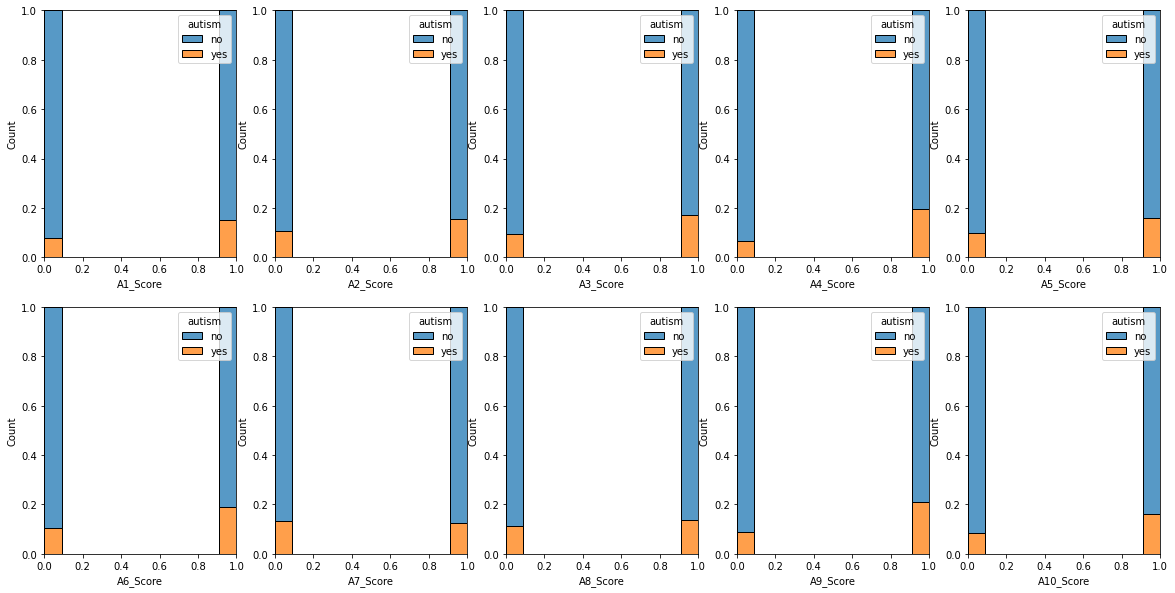

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot histograms for each variable
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for index, name in enumerate(df.iloc[:, 0:10].columns):
  sns.histplot(ax=axes[int(index/5)][index%5], data = df, x = name, hue = 'autism', multiple='fill')

From this you can see the proportion of each question where if they answered yes or no and have ASD or not. This helps us see the predictive power of each question. From this we can see all questions have some predictive power except 7 and 8 which don't seem to offer much.

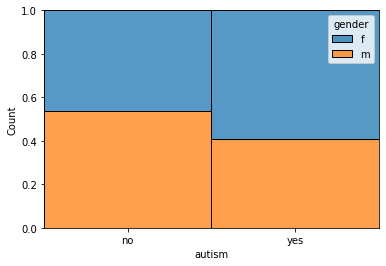

In [ ]:
sns.histplot(data=df, x ="autism", hue ="gender", multiple ="fill")

Here you can see you are slightly more likely in this sample to have ASD if you are a female so we will include it.

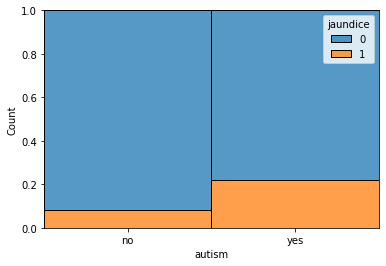

In [ ]:
sns.histplot(data=df, x = "autism", hue = "jaundice", multiple = "fill")

From this plot you can see the presence of janundice is proportionally higher in the ASD population than in those who don't have it. 

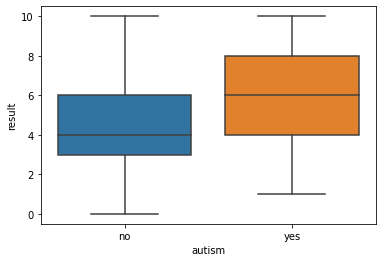

In [ ]:
sns.boxplot(data = df, x='autism', y='result')

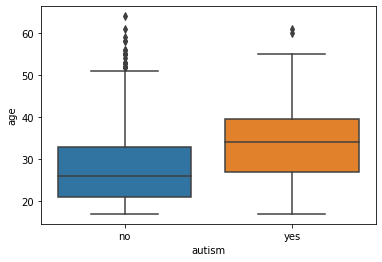

In [ ]:
sns.boxplot(data = df, x='autism', y='age')

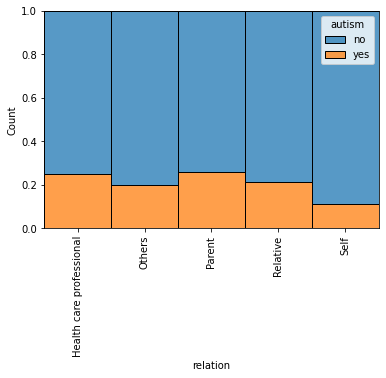

In [ ]:
g = sns.histplot(data = df, x='relation', hue='autism', multiple='fill')
g.tick_params(axis='x', rotation=90)

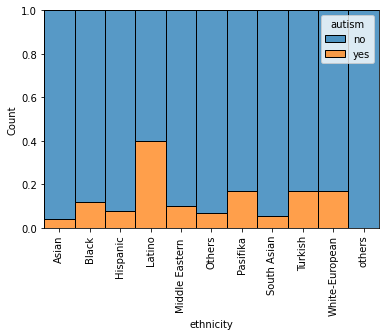

In [ ]:
g = sns.histplot(data = df, x='ethnicity', hue='autism', multiple='fill')
g.tick_params(axis='x', rotation=90)

Similarly result of the test and Age offer some predictive powere, but we will be excluding result because it is simply a variable made up of the linear combination of question responses so we will exclude it here.


### Variable Selection

Furthermore after analysis the following variables will be kept

- A1_Score
- A2_Score
- A3_Score
- A4_Score
- A5_Score
- A6_Score
- A9_Score
- A10_Score
- age
- jaundice
- relation
  - self only
- gender
- ethnicity
  - latino only


In [ ]:
keep = ('A1_Score', 
        'A2_Score', 
        'A3_Score', 
        'A4_Score', 
        'A5_Score', 
        'A6_Score', 
        'A9_Score', 
        'A10_Score',
        'age',
        'jaundice',
        'relation',
        'gender',
        'ethnicity',
        'autism')
df = df[[column for column in df.columns if column in keep]]

Decision Trees can't handle categorical data so we will convert the data frame using get_dummies which creates dummy variables for all categorical data.

In [ ]:
df = pd.get_dummies(df)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A9_Score,A10_Score,age,jaundice,...,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,autism_no,autism_yes,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,1,1,1,1,0,0,0,0,26,0,...,0,1,0,1,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,24,0,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,1,1,0,1,1,27,1,...,0,0,0,0,1,0,0,1,0,0
3,1,1,0,1,0,0,0,1,35,0,...,0,1,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,40,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A9_Score', 'A10_Score', 'age', 'jaundice', 'gender_f', 'gender_m',
       'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic',
       'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish',
       'ethnicity_White-European', 'ethnicity_others', 'autism_no',
       'autism_yes', 'relation_Health care professional', 'relation_Others',
       'relation_Parent', 'relation_Relative', 'relation_Self'],
      dtype='object')

Now we will remove unescessary subfeatures to include only Latino Ethnicity and Self relation

In [ ]:
keep = ('A1_Score', 
        'A2_Score', 
        'A3_Score', 
        'A4_Score', 
        'A5_Score', 
        'A6_Score', 
        'A9_Score', 
        'A10_Score',
        'age',
        'jaundice',
        'relation_Self',
        'gender_m',
        'ethnicity_Latino',
        'autism_yes')
df = df[[column for column in df.columns if column in keep]]
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A9_Score', 'A10_Score', 'age', 'jaundice', 'gender_m',
       'ethnicity_Latino', 'autism_yes', 'relation_Self'],
      dtype='object')

In [ ]:
X = df[[column for column in df.columns if column != 'autism_yes']]
y = df.autism_yes

Now we will separate into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A9_Score,A10_Score,age,jaundice,gender_m,ethnicity_Latino,relation_Self
24,1,1,1,1,0,0,0,0,43,0,1,0,1
155,0,0,0,0,0,0,0,1,28,0,0,0,1
210,1,0,1,1,1,1,1,1,37,0,0,0,1
291,1,1,0,1,1,0,1,1,32,0,0,0,1
537,0,1,0,0,1,1,1,1,52,0,1,0,1


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dt', DecisionTreeClassifier())])
params = [{'dt__max_depth': [3, 5, 7,15, 30, 50],
           'dt__min_samples_leaf': [2, 3, 5, 7, 12, 15],
           'dt__min_samples_split': [2, 5, 7, 10],
           'dt__splitter': ['best', 'random'],
           'dt__criterion': ['gini', 'entropy']}]
gs_dt = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='balanced_accuracy',
                      cv=5)
gs_dt.fit(X_train, y_train)
print(gs_dt.best_params_)
print(gs_dt.score(X_train, y_train))

{'dt__criterion': 'entropy', 'dt__max_depth': 50, 'dt__min_samples_leaf': 3, 'dt__min_samples_split': 5, 'dt__splitter': 'random'}
0.7237774253238171


### Model evaluation metrics

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Find the best estimator
best_dt = gs_dt.best_estimator_
best_dt.fit(X_train, y_train)

#Find the predictors for the best estimator
predictions = best_dt.predict(X_test)
predicted_probas = best_dt.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


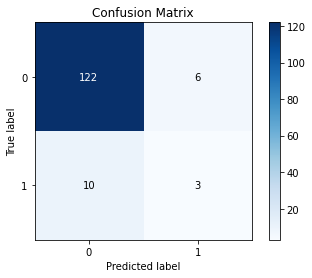

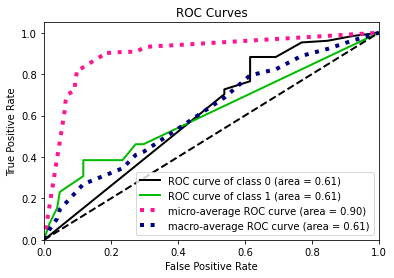

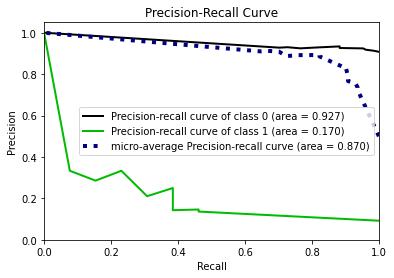

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#Plot confusion matrix, ROC curves, and Precision-Recall
skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       128
           1       0.33      0.23      0.27        13

    accuracy                           0.89       141
   macro avg       0.63      0.59      0.61       141
weighted avg       0.87      0.89      0.88       141



### Visualize

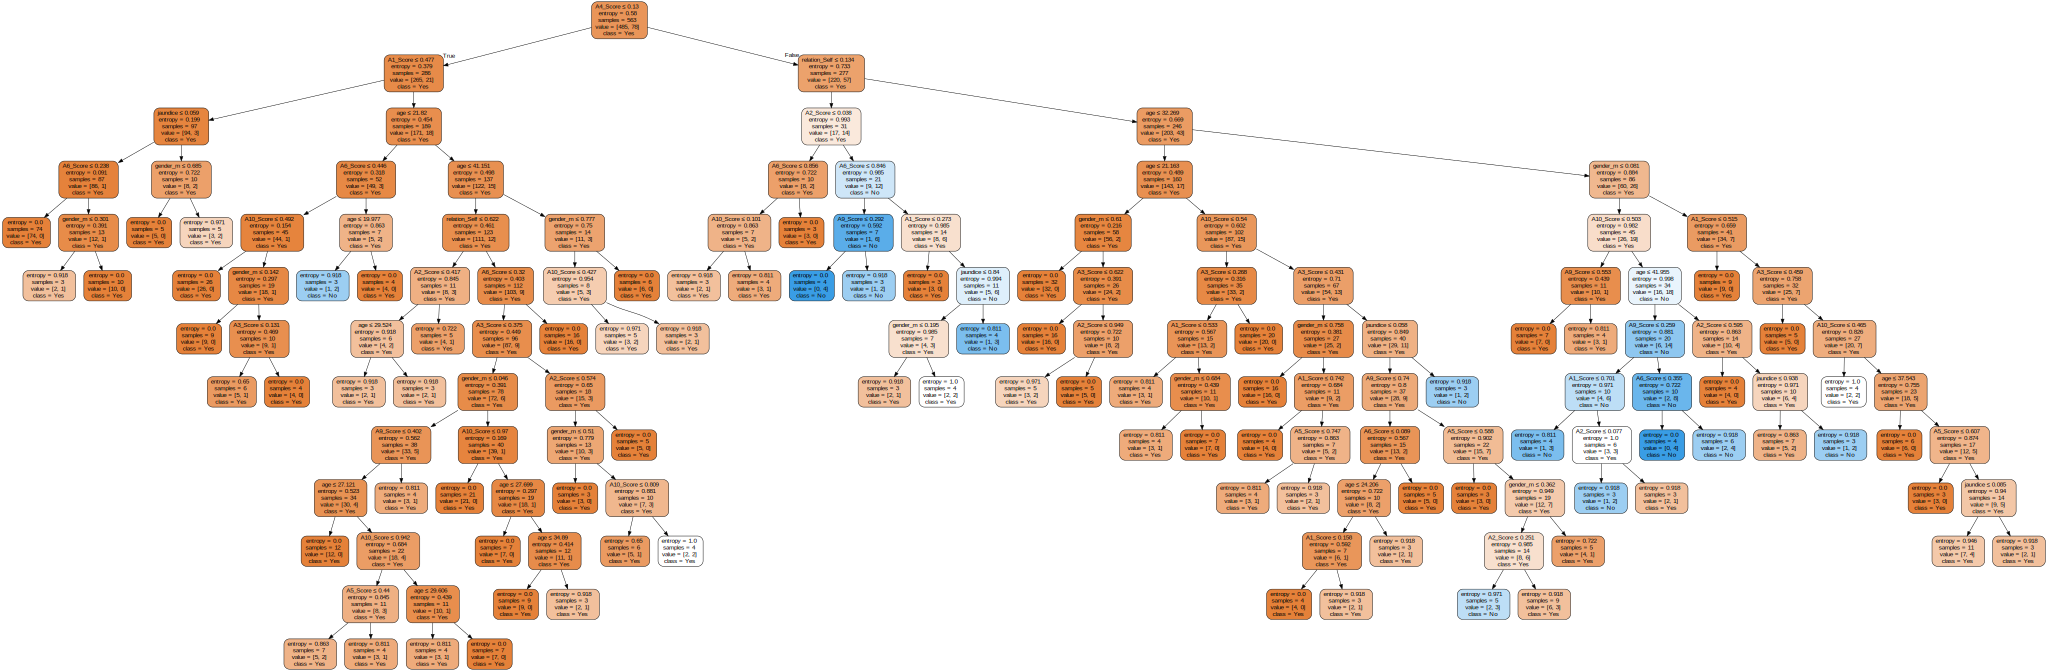

In [ ]:
import graphviz 
from sklearn import tree

best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=3, min_samples_split=5, splitter='random')
best_dt.fit(X_train, y_train)

dot_data = tree.export_graphviz(best_dt, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=['Yes','No'],  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('rf', RandomForestClassifier())])
params = [{'rf__max_depth': [2, 7, 21],
           'rf__min_samples_leaf': [1, 5, 20],
           'rf__min_samples_split': [2, 5, 10, 25],
           'rf__n_estimators': [100, 500, 1000],
           'rf__max_features': ['sqrt', 'log2']}]
gs_rf = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='balanced_accuracy',
                      cv=5)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_params_)
print(gs_rf.score(X_train, y_train))

{'rf__max_depth': 21, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
0.9807692307692308


### Metrics

In [ ]:
#Find best estimator 
best_rf = gs_rf.best_estimator_
best_rf.fit(X_train, y_train)

#Get predictions from best estimator
predictions = best_rf.predict(X_test)
predicted_probas = best_rf.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


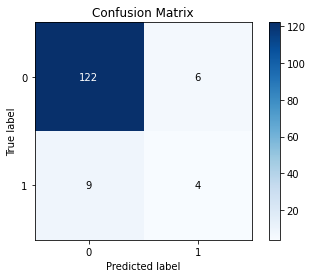

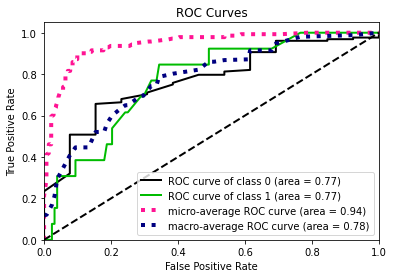

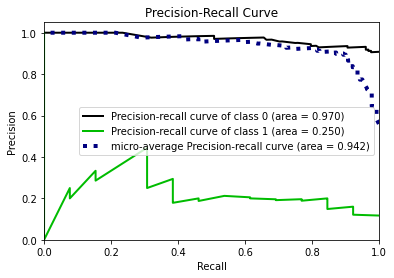

In [ ]:

#Plot confusion matrix, ROC curves, and Precision-Recall
skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       128
           1       0.40      0.31      0.35        13

    accuracy                           0.89       141
   macro avg       0.67      0.63      0.64       141
weighted avg       0.88      0.89      0.89       141



## Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('ab', AdaBoostClassifier())])
params = [{'ab__base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
           'ab__learning_rate': [1, 1.35, 1.4, 1.45, 1.5],
           'ab__n_estimators': [10, 15, 30, 45, 50, 75, 80]}]
gs_ab = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='balanced_accuracy',
                      cv=5)
gs_ab.fit(X_train, y_train)
print(gs_ab.best_params_)
print(gs_ab.score(X_train, y_train))

{'ab__base_estimator': DecisionTreeClassifier(max_depth=2), 'ab__learning_rate': 1.35, 'ab__n_estimators': 45}
0.7794078773460217


### Metrics

In [ ]:
#Find best estimator
best_ab = gs_ab.best_estimator_
best_ab.fit(X_train, y_train)

#Get best prediction from estimator
predictions = best_ab.predict(X_test)
predicted_probas = best_ab.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


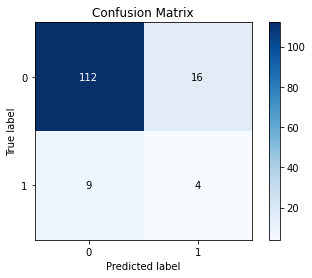

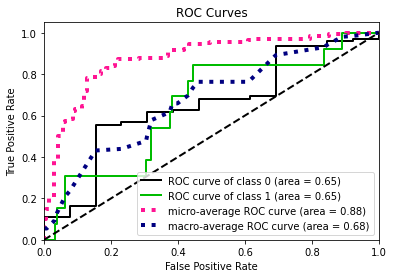

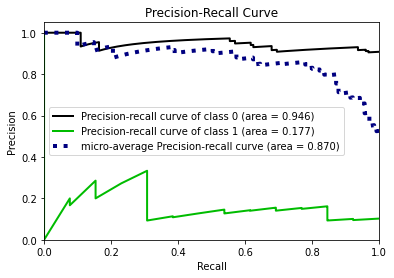

In [ ]:

#Plot confusion matrix, ROC curves, and Precision-Recall
skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

In [ ]:
best_ab = gs_ab.best_estimator_

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       128
           1       0.20      0.31      0.24        13

    accuracy                           0.82       141
   macro avg       0.56      0.59      0.57       141
weighted avg       0.86      0.82      0.84       141



## XGBoost Classifier

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
import multiprocessing

In [ ]:
xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
gs_xg = GridSearchCV(xgb_model, {'max_depth': [1, 2, 3, 4],
                                 'n_estimators': [50, 100, 150],
                                 'eta': [0.005, 0.01, .1],
                                 'lambda': [0, 0.1, .5, 1],
                                 'scale_pos_weight': [6, 6.7, 7]}, verbose=1,
                       n_jobs=2, scoring='balanced_accuracy')
gs_xg.fit(X_train, y_train)
print(gs_xg.best_score_)
print(gs_xg.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
0.6912843642611683
{'eta': 0.005, 'lambda': 0, 'max_depth': 1, 'n_estimators': 100, 'scale_pos_weight': 6}


### Metrics

In [ ]:
#Find best estimator
best_xg = gs_xg.best_estimator_
best_xg.fit(X_train, y_train)

#Get predictions from estimator
predictions = best_xg.predict(X_test)
predicted_probas = best_xg.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


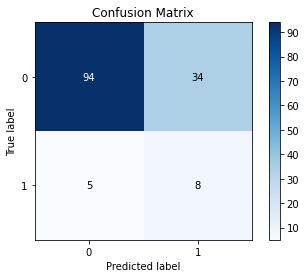

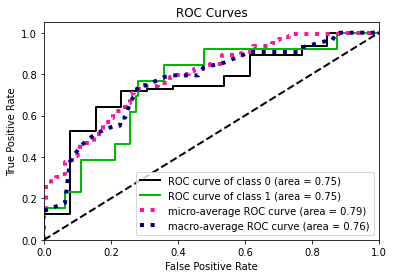

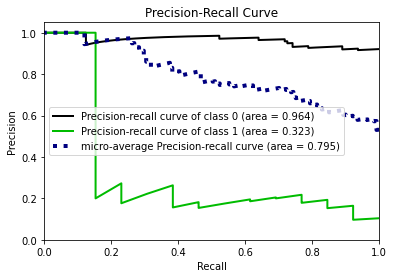

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83       128
           1       0.19      0.62      0.29        13

    accuracy                           0.72       141
   macro avg       0.57      0.67      0.56       141
weighted avg       0.88      0.72      0.78       141

